# GPS
Estos dispositivos calculan mediante satelite la coordenada geografica (lat, lon), con ella calcula la imagen que corresponde a esa posicion y pueden posteriormente descargar una imagen, que muestra el "mapa" del lugar.

El algoritmo para calcular la imagen (x, y, zoom) que le corresponde a la posicion se encuentra en:

http://wiki.openstreetmap.org/wiki/Slippy_map_tilenames

A pesar de mostrar otras posibles fuentes de imagenes, nosotros utilizaremos la de arcgis. Existe una serie de opciones, que puede verlas en:
http://bcdcspatial.blogspot.cl/2012/01/onlineoffline-mapping-map-tiles-and.html


A pesar que el ejemplo de la pagina anterior dice World_Topo_Map, utilizaremos World_Imagery, las alternativas las puede ver en:
http://services.arcgisonline.com/arcgis/rest/services

In [1]:
# Codigo sacado de la pagina de slippy map.
import math
def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)

Ubicamos por google maps, el estadio Santiago Bernabeu

In [2]:
lat_bernabeu = 40.453062
lon_bernabeu = -3.688369
zoom = 16
x,y = deg2num(lat_bernabeu, lon_bernabeu, zoom)

In [3]:
print(x,y)

32096 24702


In [4]:
url = "http://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/"
url += str(zoom)
url += "/"
url += str(y)
url += "/"
url += str(x)
url += ".png"

In [5]:
url

'http://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/16/24702/32096.png'

In [6]:
import urllib.request

In [7]:
pagina = urllib.request.urlopen(url)

In [8]:
datos = pagina.read()

In [9]:
archivo = open("bernabeu.png", "wb")

In [10]:
archivo.write(datos)

22991

In [11]:
archivo.close()

Al final se puede ver que el archivo "bernabeu.png", es la imagen satelital de ese estadio

In [12]:
import PIL.Image

In [13]:
foto_entrada = PIL.Image.open("bernabeu.png")

In [15]:
w,h =foto_entrada.size

In [16]:
print(w,h)

256 256


In [17]:
foto_entrada.getpixel((0,0))

(131, 143, 129)

In [18]:
foto_salida = PIL.Image.new("RGB", (512,256))

In [24]:
for i in range(w):
    for j in range(h):
        r,g,b = foto_entrada.getpixel((i,j))
        prom = (r+g+b)//3
        foto_salida.putpixel((i,j),(r,g,b))
        foto_salida.putpixel((256+j,i),(prom,prom,prom))

In [25]:
foto_salida.save("seccion3.png")

In [26]:
import IPython.display

In [27]:
foto = IPython.display.Image("seccion3.png")

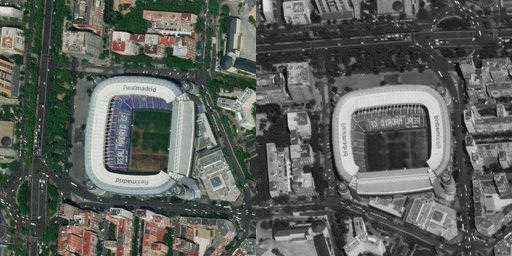

In [28]:
IPython.display.display(foto)

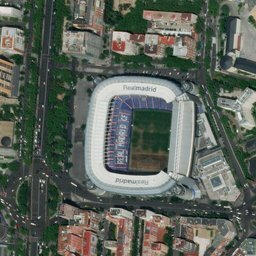

In [29]:
foto_entrada